In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import tensorflowjs as tfjs
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd

In [48]:
df = pd.read_csv("../ingest/file_3_oneHotEnc.csv", header = 0)

## State level and prep data

In [49]:
df_state = df.copy()
df_state = df_state.groupby(['YEAR','STATE','SPEEDING_1', 'SPEEDING_2', 'ALCOHOL_1', 'ALCOHOL_2', 'ALCOHOL_3',
       'DISTRACTED_1', 'DISTRACTED_2', 'SROWSY_1', 'SROWSY_2', 'WRK_ZONE_0',
       'WRK_ZONE_1', 'WRK_ZONE_2', 'WRK_ZONE_3', 'WRK_ZONE_4', 'WRK_ZONE_8',
       'WEATHER_0', 'WEATHER_1', 'WEATHER_99','DRIVER_AGE_BUCKET_Adult (25-64)', 'DRIVER_AGE_BUCKET_Senior (65+)',
       'DRIVER_AGE_BUCKET_Teen (15-20)',
       'DRIVER_AGE_BUCKET_Young Adult (21-24)'], as_index=False)['FATALS'].sum()
df_state = df_state.rename(columns={'DRIVER_AGE_BUCKET_Adult (25-64)':'DRIVER_AGE_BUCKET_Adult', 
                         'DRIVER_AGE_BUCKET_Senior (65+)':'DRIVER_AGE_BUCKET_Senior',
       'DRIVER_AGE_BUCKET_Teen (15-20)':'DRIVER_AGE_BUCKET_Teen',
       'DRIVER_AGE_BUCKET_Young Adult (21-24)':'DRIVER_AGE_BUCKET_Young'})
df_state.pop("YEAR")
df_state.head()

,STATE,SPEEDING_1,SPEEDING_2,ALCOHOL_1,ALCOHOL_2,ALCOHOL_3,DISTRACTED_1,DISTRACTED_2,SROWSY_1,SROWSY_2,...,WRK_ZONE_4,WRK_ZONE_8,WEATHER_0,WEATHER_1,WEATHER_99,DRIVER_AGE_BUCKET_Adult,DRIVER_AGE_BUCKET_Senior,DRIVER_AGE_BUCKET_Teen,DRIVER_AGE_BUCKET_Young,FATALS
0,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1
1,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
2,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,4
3,1,0,1,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,5
4,1,0,1,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,5


In [50]:
states = df.STATE.unique().tolist()
speeding = np.identity(2, dtype=int).tolist()
alcohol = np.identity(3, dtype=int).tolist()
distracted = np.identity(2, dtype=int).tolist()
drowsy = np.identity(2, dtype=int).tolist()
work = np.identity(6, dtype=int).tolist()
weather = np.identity(3, dtype=int).tolist()
age = np.identity(4, dtype=int).tolist()

master = []
for state in states:
    for speed in speeding:
        for drink in alcohol:
            for dist in distracted:
                for sleep in drowsy:
                    for zone in work:
                        for cloud in weather:
                            for sis in age:
                                master.append([state]+speed+drink+dist+sleep+zone+cloud+sis + [0])
df_missing = pd.DataFrame(master, columns=['STATE','SPEEDING_1', 'SPEEDING_2', 'ALCOHOL_1', 'ALCOHOL_2', 'ALCOHOL_3',
       'DISTRACTED_1', 'DISTRACTED_2', 'SROWSY_1', 'SROWSY_2', 'WRK_ZONE_0',
       'WRK_ZONE_1', 'WRK_ZONE_2', 'WRK_ZONE_3', 'WRK_ZONE_4', 'WRK_ZONE_8',
       'WEATHER_0', 'WEATHER_1', 'WEATHER_99','DRIVER_AGE_BUCKET_Adult', 'DRIVER_AGE_BUCKET_Senior',
       'DRIVER_AGE_BUCKET_Teen',
       'DRIVER_AGE_BUCKET_Young', 'FATALS'])
df_state = df_state.merge(df_missing, on=list(df_state), how='outer')
df_state.drop_duplicates(inplace=True, keep='first')

In [51]:
df_state

,STATE,SPEEDING_1,SPEEDING_2,ALCOHOL_1,ALCOHOL_2,ALCOHOL_3,DISTRACTED_1,DISTRACTED_2,SROWSY_1,SROWSY_2,...,WRK_ZONE_4,WRK_ZONE_8,WEATHER_0,WEATHER_1,WEATHER_99,DRIVER_AGE_BUCKET_Adult,DRIVER_AGE_BUCKET_Senior,DRIVER_AGE_BUCKET_Teen,DRIVER_AGE_BUCKET_Young,FATALS
0,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1
5,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
10,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,4
13,1,0,1,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,5
15,1,0,1,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161687,56,0,1,0,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
161688,56,0,1,0,0,1,0,1,0,1,...,0,1,0,0,1,1,0,0,0,0
161689,56,0,1,0,0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
161690,56,0,1,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [52]:
df_state_states = pd.get_dummies(df_state['STATE'], prefix='STATE')
df_state = pd.concat([pd.get_dummies(df_state['STATE'], prefix='STATE'),df_state],axis=1)
df_state.pop("STATE")


df_state.head()

,STATE_1,STATE_2,STATE_4,STATE_5,STATE_6,STATE_8,STATE_9,STATE_10,STATE_11,STATE_12,...,WRK_ZONE_4,WRK_ZONE_8,WEATHER_0,WEATHER_1,WEATHER_99,DRIVER_AGE_BUCKET_Adult,DRIVER_AGE_BUCKET_Senior,DRIVER_AGE_BUCKET_Teen,DRIVER_AGE_BUCKET_Young,FATALS
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
10,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,4
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,5
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,5


In [53]:
df_state_states.columns

Index(['STATE_1', 'STATE_2', 'STATE_4', 'STATE_5', 'STATE_6', 'STATE_8',
       'STATE_9', 'STATE_10', 'STATE_11', 'STATE_12', 'STATE_13', 'STATE_15',
       'STATE_16', 'STATE_17', 'STATE_18', 'STATE_19', 'STATE_20', 'STATE_21',
       'STATE_22', 'STATE_23', 'STATE_24', 'STATE_25', 'STATE_26', 'STATE_27',
       'STATE_28', 'STATE_29', 'STATE_30', 'STATE_31', 'STATE_32', 'STATE_33',
       'STATE_34', 'STATE_35', 'STATE_36', 'STATE_37', 'STATE_38', 'STATE_39',
       'STATE_40', 'STATE_41', 'STATE_42', 'STATE_44', 'STATE_45', 'STATE_46',
       'STATE_47', 'STATE_48', 'STATE_49', 'STATE_50', 'STATE_51', 'STATE_53',
       'STATE_54', 'STATE_55', 'STATE_56'],
      dtype='object')

In [54]:
train_dataset = df_state.sample(frac=0.8,random_state=0)
test_dataset = df_state.drop(train_dataset.index)

In [55]:
train_labels = train_dataset.pop('FATALS')
test_labels = test_dataset.pop('FATALS')

## Neural network for State Level

In [56]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [57]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                4736      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [58]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.17266916],
       [ 0.0319559 ],
       [-0.01734784],
       [ 0.06890973],
       [ 0.10748564],
       [ 0.05630736],
       [-0.04636756],
       [ 0.06097135],
       [ 0.14151205],
       [ 0.10272066]], dtype=float32)

In [59]:
EPOCHS = 1000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(train_dataset, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:239.7836,  mae:3.6695,  mse:239.7837,  val_loss:209.1123,  val_mae:3.1358,  val_mse:209.1123,  
....................................................................................................
Epoch: 100, loss:62.8880,  mae:2.1512,  mse:62.8881,  val_loss:76.6094,  val_mae:2.2739,  val_mse:76.6093,  
...............................................

In [60]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)


25455/25455 - 0s - loss: 91.4925 - mae: 2.2682 - mse: 91.4925


Text(0, 0.5, 'MAE num fatalities')

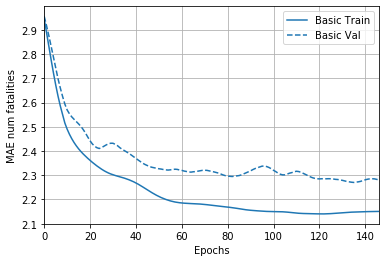

In [61]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE num fatalities')

Text(0, 0.5, 'MSE num fatalities')

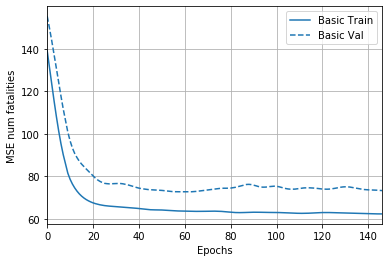

In [62]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE num fatalities')

In [63]:
tfjs.converters.save_keras_model(model, "../ingest/nn/")

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model## Linear regression for State Level

# Linear Regression see https://techbrij.com/tensorflow-linear-regression-model

In [64]:
def build_model2():
  model = keras.Sequential([
    layers.Dense(1, activation='relu', input_shape=[len(train_dataset.keys())])
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
model = build_model2()
model.summary()

EPOCHS = 600

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(train_dataset, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 74        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:399.8379,  mae:4.7873,  mse:399.8379,  val_loss:442.2421,  val_mae:4.9314,  val_mse:442.2420,  
....................................................................................................
Epoch: 100, loss:223.7174,  mae:3.3116,  mse:223.7176,  val_loss:274.0908,  val_mae:3.3891,  val_mse:274.0910,  
....................................................................................................
Epoch: 200, loss:205.9073,  mae:3.2270,  mse:205.9074,  val_loss:253.6554,  val_mae:3.3133,  val_mse:253.6556,  
....................................................................................................
Epoch: 300,

In [65]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

25455/25455 - 0s - loss: 245.3329 - mae: 3.2603 - mse: 245.3329


Text(0, 0.5, 'MAE num fatalities')

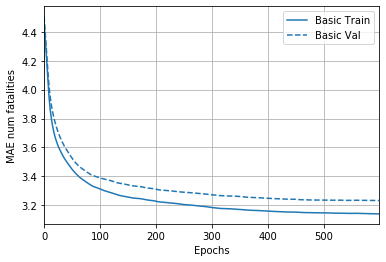

In [66]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE num fatalities')

Text(0, 0.5, 'MSE num fatalities')

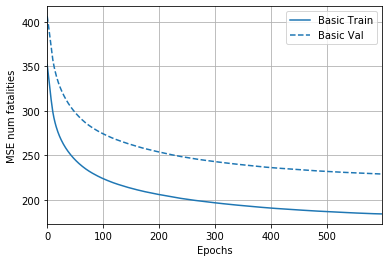

In [67]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE num fatalities')

In [68]:
tfjs.converters.save_keras_model(model, "../ingest/linear_web/")

In [69]:
print(model.layers[0].get_weights())
print(train_dataset.keys())


[array([[-20.64445  ],
       [-69.57984  ],
       [-24.299198 ],
       [-38.939194 ],
       [ 35.095806 ],
       [-50.40319  ],
       [-55.991146 ],
       [-70.43829  ],
       [-75.20475  ],
       [ 19.270037 ],
       [ -6.516937 ],
       [-69.1775   ],
       [-68.76554  ],
       [-16.190395 ],
       [-27.049913 ],
       [-47.26585  ],
       [-54.588448 ],
       [-29.34017  ],
       [-25.372208 ],
       [-69.06357  ],
       [-50.578964 ],
       [-48.981674 ],
       [-16.25861  ],
       [-48.66138  ],
       [-29.913229 ],
       [-25.473387 ],
       [-68.23404  ],
       [-60.973396 ],
       [-55.774    ],
       [-69.93313  ],
       [-34.572033 ],
       [-62.78709  ],
       [-14.282539 ],
       [ -3.6367705],
       [-75.35299  ],
       [-15.286515 ],
       [-41.882263 ],
       [-54.103107 ],
       [-16.286505 ],
       [-70.25113  ],
       [-20.22055  ],
       [-70.1411   ],
       [-15.690594 ],
       [ 31.0141   ],
       [-61.425186 ],
       [-